# Context
Diabetes is one of the deadliest and chronic diseases. About one in seven U.S. adults has diabetes now. By 2050, as many as one in three may become diabetic.


Many complications occur if diabetes remains untreated and unidentified.
Identifying patients who are at high-risk of becoming diabetic allows early medical interventions.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# Project

1) Develop ML models By applying LogisticRegression, SVM, RandomForest classification algorithms. <br>
2) Apply GridSearchCV to find the best hyperparameters for your models<br>
3) Assess model performance (confusion matrix, precision, recall, ROC AUC) and interpret performance from business impact viewpoint (false negatives vs false positives).

# Importing Packages and Data

In [1]:
# Import all required packages for our analysis
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [2]:
# Import dataset
diabetes_data = pd.read_csv("diabetes.csv")

# Business Understanding

With the increased cases of diabetes, there has been an increased value in being able to predict cases of diabetes at early stages. Not only will this help in early treatment, but it will also help ease on hospital demands.

Our objective is to try to utilize an available dataset in order to understand the significance of specific features on the outcome, whether a person has diabetes or not.

# Data Understanding & Preparation

The first step before performing our modeling should be understanding the data that we're working with.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Let's take a quick look at those variables to make sure everything is in check.

In [3]:
diabetes_data.info() #no null values, good start

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As highlighted in the ML Canvas prepared, a good way to understand data is to research and read literature about these independent variables within our dataset.

Looking at the summary above, we notice some variables have a minimum value of 0 which doesn't make sense (Glucose, BloodPressure, SkinThickness, Insulin & BMI). Based on my research from several publications including "Exploratory Data Analysis Using R", Harvard's revised dataverse, there are several ways these 0 values may been handled either through imputation or deletion. 

The problem with deletion is we will reduce an already small dataset; whereas, the problem with imputation is we are jeopardizing the integrity of our dataset. This is always a dilemma, nonetheless, I will go ahead with the deletion option to avoid jeopardizing the integrity of our dataset.

In [5]:
# Replacing 0s in columns with null values
diabetes_data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] =  diabetes_data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.NaN)

In [6]:
# Checking number of null values
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
# Dropping Null Rows
diabetes_data.dropna(inplace=True)

In [8]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
Pregnancies                 392 non-null int64
Glucose                     392 non-null float64
BloodPressure               392 non-null float64
SkinThickness               392 non-null float64
Insulin                     392 non-null float64
BMI                         392 non-null float64
DiabetesPedigreeFunction    392 non-null float64
Age                         392 non-null int64
Outcome                     392 non-null int64
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [9]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Model Development

We will build multiple classification models to see how our features are associated with our outcome variable. However, in order to prepare such a model, we want to separate our existing dataset into a training and testing data.

Why split the data? While we do have a small sample of data (especially after deleting rows with missing values), it's important to understand how well our model is predicting on new data available. We wouldn't want to oversell a model that works very well with our small dataset that is open to failure when we begin introducing new data for newer patients. 

A common practice is to use a 70/30 ratio for training and testing respectively.

In [10]:
# Assigning features (input) and outcome (output)
X0 = diabetes_data.loc[:, diabetes_data.columns != 'Outcome']
Y0 = diabetes_data.loc[:, diabetes_data.columns == 'Outcome']

In [11]:
# Assigning training & testing data 
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.3, random_state=1)

## Logistic Regression

In [12]:
Logistic_Model = sm.Logit(Y0_train,X0_train)
Logistic_Fit = Logistic_Model.fit()
print(Logistic_Fit.summary2())#model summary

Optimization terminated successfully.
         Current function value: 0.571437
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.111     
Dependent Variable:    Outcome            AIC:                329.1476  
Date:                  2020-04-23 16:53   BIC:                358.0526  
No. Observations:      274                Log-Likelihood:     -156.57   
Df Model:              7                  LL-Null:            -176.20   
Df Residuals:          266                LLR p-value:        1.7568e-06
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1323   0.0621  2.1298 0

In [13]:
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X0_train, Y0_train) #model fitting

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_regression.score(X0_test, Y0_test)))

Accuracy of logistic regression classifier on test set: 0.75


## Support Vector Machine (SVM)

In [15]:
SVM = svm.SVC(probability=True)
SVM.fit(X0_train,Y0_train)

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [16]:
print('Accuracy of SVM classifier on test set: {:.2f}'.format(SVM.score(X0_test, Y0_test)))

Accuracy of SVM classifier on test set: 0.73


## RandomForest

In [17]:
random_forest = RandomForestClassifier()
random_forest.fit(X0_train, Y0_train) #model fitting

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
print('Accuracy of random forest classifier on test set: {:.2f}'.format(random_forest.score(X0_test, Y0_test)))

Accuracy of random forest classifier on test set: 0.74


# Hyperparameters &  Model Performance

## Logistic Regression

### Hyper Parameters

In [19]:
param_grid = {'C':np.logspace(-4, 4, 20), 
              'max_iter':[10000]}
grid_logistic_regression = GridSearchCV(estimator=logistic_regression,param_grid=param_grid, cv=3)
grid_logistic_regression.fit(X0_train, Y0_train.values.ravel())

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2...e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 

### Model Performance

In [20]:
print(grid_logistic_regression.best_params_)
print('\n')
print('Accuracy of logistic regression classifier on test set after adjusting hyperparameters: {:.2f}'.format(grid_logistic_regression.score(X0_test, Y0_test)))

{'C': 0.00026366508987303583, 'max_iter': 10000}


Accuracy of logistic regression classifier on test set after adjusting hyperparameters: 0.75


In [21]:
Y0_pred = grid_logistic_regression.predict(X0_test)
# Confusion matrix
confusion_matrix_logistic_regression = confusion_matrix(Y0_test, Y0_pred)
print(confusion_matrix_logistic_regression) 

[[69 13]
 [17 19]]


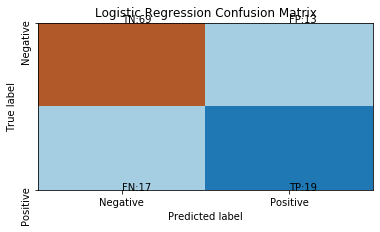

In [22]:
plt.clf()
plt.imshow(confusion_matrix_logistic_regression, interpolation='nearest', cmap=plt.cm.Paired)
classNames = ['Negative','Positive']
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames, rotation = 90)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+":"+str(confusion_matrix_logistic_regression[i][j]))
plt.show()

In [23]:
# Precision, recall
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        82
           1       0.59      0.53      0.56        36

    accuracy                           0.75       118
   macro avg       0.70      0.68      0.69       118
weighted avg       0.74      0.75      0.74       118



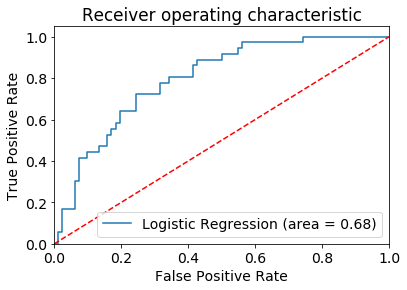

In [24]:
# ROC AUC
plt.rc("font", size=14)
logit_roc_auc = roc_auc_score(Y0_test, grid_logistic_regression.predict(X0_test))
fpr, tpr, thresholds = roc_curve(Y0_test, grid_logistic_regression.predict_proba(X0_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() #ROC curve stays above average line. the model is good.

## Support Vector Machine (SVM)

In [25]:
param_grid = {'gamma': [0.00001,0.0001,0.001,0.01],
              'C': [0.00001,0.0001,0.001,0.01],
              'kernel': ['linear','rbf']}
grid_SVM = GridSearchCV(estimator=SVM,param_grid=param_grid, cv=3)
grid_SVM.fit(X0_train, Y0_train.values.ravel())

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
print(grid_SVM.best_params_)
print('\n')
print('Accuracy of SVM classifier on test set after adjusting hyperparameters: {:.2f}'.format(grid_SVM.score(X0_test, Y0_test)))

{'C': 0.0001, 'gamma': 1e-05, 'kernel': 'linear'}


Accuracy of SVM classifier on test set after adjusting hyperparameters: 0.75


In [27]:
Y0_pred = grid_SVM.predict(X0_test)
# Confusion matrix
confusion_matrix_SVM = confusion_matrix(Y0_test, Y0_pred)
print(confusion_matrix_SVM) 

[[69 13]
 [16 20]]


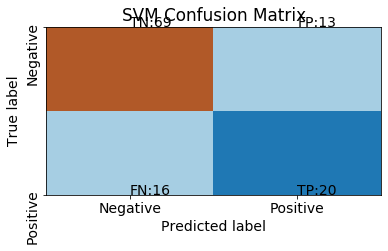

In [28]:
plt.clf()
plt.imshow(confusion_matrix_SVM, interpolation='nearest', cmap=plt.cm.Paired)
classNames = ['Negative','Positive']
plt.title('SVM Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames, rotation = 90)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+":"+str(confusion_matrix_SVM[i][j]))
plt.show()

In [29]:
# Precision, recall
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        82
           1       0.61      0.56      0.58        36

    accuracy                           0.75       118
   macro avg       0.71      0.70      0.70       118
weighted avg       0.75      0.75      0.75       118



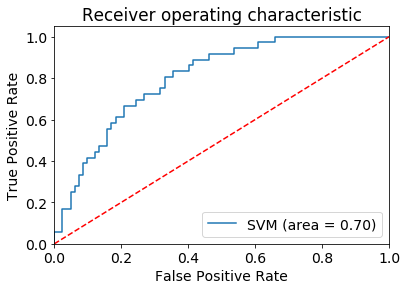

In [30]:
# ROC AUC
plt.rc("font", size=14)
SVM_roc_auc = roc_auc_score(Y0_test, grid_SVM.predict(X0_test))
fpr, tpr, thresholds = roc_curve(Y0_test, grid_SVM.predict_proba(X0_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show() #ROC curve stays above average line. the model is good.

## RandomForest

In [31]:
param_grid = {'max_depth':[1,5,9],
              'max_features':[1,3,5],
              'min_samples_leaf':[2,4,6],
              'min_samples_split':[3,5,7],
              'n_estimators':[100,250]}
grid_random_forest = GridSearchCV(estimator=random_forest,param_grid=param_grid, cv=3)
grid_random_forest.fit(X0_train, Y0_train.values.ravel())

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [32]:
print(grid_random_forest.best_params_)
print('\n')
print('Accuracy of random forest classifier on test set after adjusting hyperparameters: {:.2f}'.format(grid_random_forest.score(X0_test, Y0_test)))

{'max_depth': 9, 'max_features': 3, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 250}


Accuracy of random forest classifier on test set after adjusting hyperparameters: 0.77


In [33]:
Y0_pred = grid_random_forest.predict(X0_test)
# Confusion matrix
confusion_matrix_random_forest = confusion_matrix(Y0_test, Y0_pred)
print(confusion_matrix_random_forest) 

[[69 13]
 [14 22]]


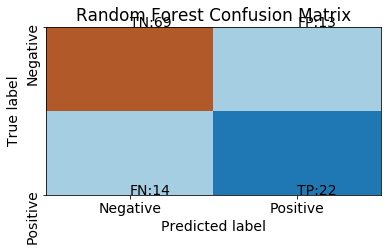

In [34]:
plt.clf()
plt.imshow(confusion_matrix_random_forest, interpolation='nearest', cmap=plt.cm.Paired)
classNames = ['Negative','Positive']
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames, rotation = 90)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+":"+str(confusion_matrix_random_forest[i][j]))
plt.show()

In [35]:
# Precision, recall
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        82
           1       0.63      0.61      0.62        36

    accuracy                           0.77       118
   macro avg       0.73      0.73      0.73       118
weighted avg       0.77      0.77      0.77       118



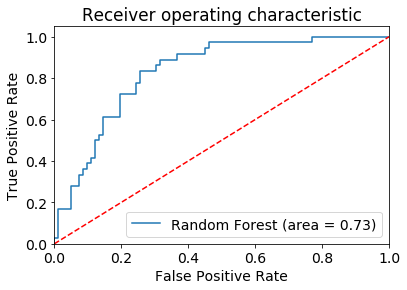

In [36]:
# ROC AUC
plt.rc("font", size=14)
random_forest_roc_auc = roc_auc_score(Y0_test, grid_random_forest.predict(X0_test))
fpr, tpr, thresholds = roc_curve(Y0_test, grid_random_forest.predict_proba(X0_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % random_forest_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Random_Forest_ROC')
plt.show() #ROC curve stays above average line. the model is good.

# Interpretation

After adjusting for hyperparameters multiple times, we deduced that the model improves in all cases! 

Looking at accuracy alone, we could see that all three models had almost similar accuracies with 75% for logistic regression, 75% for SVM and 77% for Random Forest. 

However, let's dive into other means of evaluation.

<b> Confusion Matrix </b>

Before looking at the confusion matrix, let's understand what each parameter means:<br><br>
<u>True Positives (TP):</u> Cases in which the model correctly predicts that the patient <b>DOES</b> have diabetes.

<u>True Negatives (TN):</u> Cases in which the model predicted correctly predicts that the patient <b>DOESN'T</b> have diabetes. 

<u>False Positives (FP):</u> Cases in which the model predicted YES, and they do not have diabetes. Also known as Type I error.

<u>False Negatives (FN):</u> Cases in which the model predicted NO, and they have diabetes. Also known as Type II error.

Looking at the above, it's important to note that when the model fails to predict on the testing dataset, there are two different types of errors, the False Positives and False Negatives. The significance of each is different in each case.

In our case, it would make sense that a false negative has more harmful impact than a false positive. In other words, it's better to incorrectly predict that a patient has diabetes than incorrectly predict that they don't. 

Since most of the model accuracies are similar, perhaps it's best we consider the model which has the lower FN or Type II Error.

In this evaluation metric, that would be the random forest model (highest TP and lowest FN). 

<b> Precision & Recall </b>

Looking at the precision and recall scores for all three models, we could notice that the results are almost similar for all. However, interestingly, we notice that the random forest model performs a little higher in all three cases.

<b> ROC / AUC </b>

In this model evaluation, a plot of the true positive rate against the false positive rate is made. 

The closer the curve comes to the diagonal of the ROC space, the less accurace the test results. Hence, the area under the curve is the measure of test accuracy.

We notice that the random forest performs best with an area of 0.73 compared to 0.70/0.68 for the other two models. 

According to the above three evaluation assessments, it would be advisable to <b>proceed with the random forest model</b> for deployment. Besides, it's higher prediction accuracy it also has more hyperparameters to tune from giving us more leverage to enhance our model (time-consuming though). Nonetheless, given the close proximity of the accuracies, it would be worth re-checking upon obtaining more patient data.